In [1]:
#根据年龄、在家听音乐的频率、读书频率预测是否受过大学教育
# 为这个项目导入需要的库
import numpy as np
import pandas as pd
from time import time
# 允许为DataFrame使用display()
from IPython.display import display 
from matplotlib import pyplot as plt

# 为notebook提供更加漂亮的可视化
# %matplotlib inline


# # 导入数据
# data = pd.read_excel("E:\\桌面\\test.xlsx")
# data

In [ ]:
import torch

In [2]:
data.info()

NameError: name 'data' is not defined

In [ ]:
data.describe()

,Q9-最高受教育程度,Q10-房屋面积,Q11-户口登记状况,Q12-在家听音乐,Q13-A38爱情保守度,Q14-A39爱情忠诚度,Q15-婚姻首要目的,Q16-读书_new,Q17-年龄
count,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000
mean,5.288628,1234.605611,1.765127,3.157962,2.180777,1.193572,2.473231,2.082154,53.799963
std,3.308336,3127.502467,1.148128,1.589514,1.216525,0.505551,1.408600,1.333062,17.625736
min,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000
25%,3.000000,78.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,39.000000
50%,4.000000,108.000000,1.000000,3.000000,2.000000,1.000000,2.000000,2.000000,55.000000
75%,7.000000,160.000000,2.000000,5.000000,3.000000,1.000000,4.000000,3.000000,68.000000
max,13.000000,9999.000000,7.000000,5.000000,5.000000,3.000000,5.000000,5.000000,101.000000


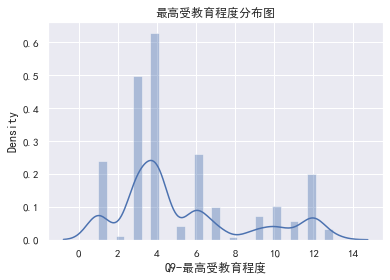

In [ ]:
import seaborn as sns
import warnings
#设置为seaborn风格
sns.set()
#不显示警告
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

#绘制分布图
sns.distplot(data['Q9-最高受教育程度'], norm_hist=False, kde=True)
plt.title('最高受教育程度分布图')
plt.show()

In [ ]:
len(data[(data['Q9-最高受教育程度'] <6 )|(data['Q9-最高受教育程度'] ==6 )])/len(data)
len(data[(data['Q9-最高受教育程度'] >6)&((data['Q9-最高受教育程度'] <10)|(data['Q9-最高受教育程度'] ==10))])/len(data)
len(data[(data['Q9-最高受教育程度'] >11)|(data['Q9-最高受教育程度'] ==11) ])/len(data)

0.12724605793912724

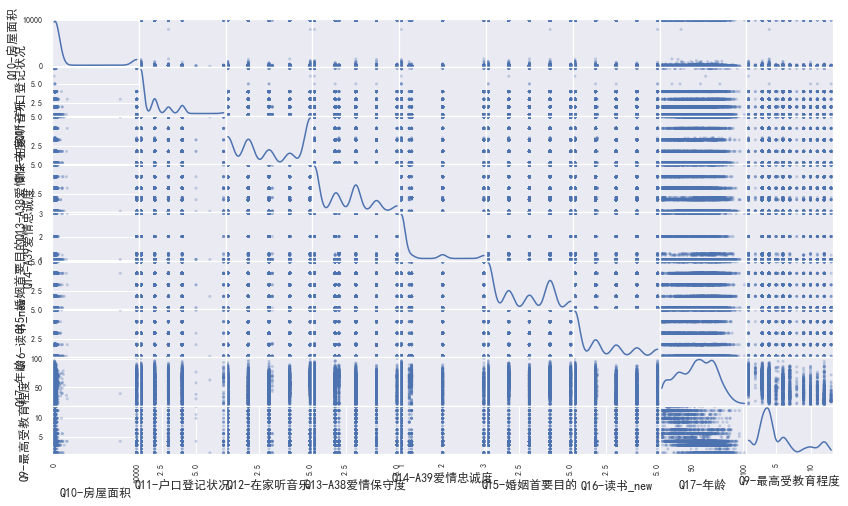

In [ ]:
#查看特征的分布和相关性
#对角线就是特征的分布
#第i行j列表示第i个特征和第j个特征的散点图
pd.plotting.scatter_matrix(data[data.columns.difference(['label'])], alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [ ]:
## 查看特征的分布情况
for col in ['Q12-在家听音乐','Q16-读书_new','Q17-年龄','Q9-最高受教育程度']:
    display(pd.value_counts(data[col]))
    print("========")

5.000000    1871
1.000000    1187
2.000000    1095
3.000000     699
4.000000     586
3.157962      16
Name: Q12-在家听音乐, dtype: int64

1.000000    2723
2.000000    1007
3.000000     710
4.000000     543
5.000000     458
2.082154      13
Name: Q16-读书_new, dtype: int64

60     147
52     132
58     127
72     124
61     122
      ... 
93       5
96       3
94       3
101      1
97       1
Name: Q17-年龄, Length: 78, dtype: int64

4.000000     1525
3.000000     1206
6.000000      630
1.000000      583
12.000000     483
10.000000     248
7.000000      241
9.000000      176
11.000000     135
5.000000       89
13.000000      76
2.000000       28
8.000000       23
5.288628       11
Name: Q9-最高受教育程度, dtype: int64

In [ ]:
# #增加一列数据标签，表示是否受过大学教育，0表示未受过，1表示受过
# label1=data['Q9-最高受教育程度'].values
# label1

In [ ]:
# label=np.where(label1>8,1,0)
# data['label']=label
# data=data.drop('Q9-最高受教育程度',axis = 1)
# data

In [ ]:
data['Q9-最高受教育程度']=pd.cut(data['Q9-最高受教育程度'],bins=[0,6,10,15],labels=[1,2,3])
data

,Q9-最高受教育程度,Q10-房屋面积,Q11-户口登记状况,Q12-在家听音乐,Q13-A38爱情保守度,Q14-A39爱情忠诚度,Q15-婚姻首要目的,Q16-读书_new,Q17-年龄
0,1,169,1,1.0,5.0,1.193572,4,1.0,69
1,1,300,1,5.0,4.0,1.000000,1,1.0,38
2,1,140,1,5.0,1.0,1.000000,4,3.0,74
3,1,280,1,2.0,5.0,1.000000,4,4.0,68
4,1,92,1,1.0,3.0,1.000000,2,1.0,63
...,...,...,...,...,...,...,...,...,...
5449,2,105,4,1.0,1.0,1.000000,3,3.0,59
5450,1,220,1,5.0,1.0,1.000000,2,1.0,69
5451,1,250,1,2.0,1.0,1.000000,4,2.0,54
5452,1,75,1,4.0,1.0,1.000000,3,1.0,60


In [ ]:
## 数据集划分
from sklearn.model_selection import train_test_split

# X为自变量
X = data.drop('Q9-最高受教育程度',axis = 1)#除去自变量的所有列
# y为因变量
y = data['Q9-最高受教育程度']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,y_train.shape)
X_train.dropna(how="all",inplace=True)
y_train.dropna(how="all",inplace=True)
print(X_train.shape,y_train.shape)


(4363, 8) (4363,)
(4363, 8) (4363,)


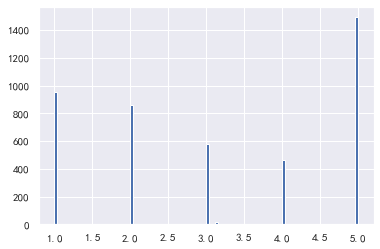

In [ ]:
#可视化
plt.hist(X_train['Q12-在家听音乐'],bins=100);

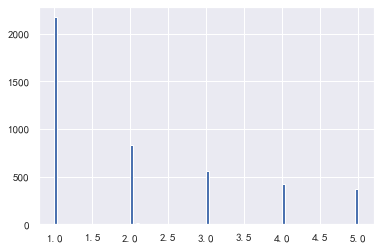

In [ ]:
plt.hist(X_train['Q16-读书_new'],bins=100);

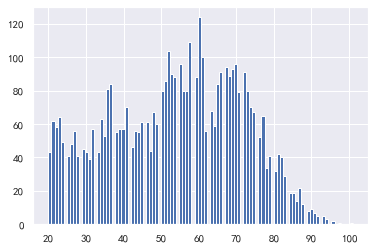

In [ ]:
plt.hist(X_train['Q17-年龄'],bins=100);

In [ ]:
#归一化特征
from sklearn.preprocessing import MinMaxScaler

# 初始化一个 scaler，并将它施加到特征上
scaler = MinMaxScaler()
# numerical = ['Q12-在家听音乐', 'Q16-读书_new', 'Q17-年龄']
X_train = scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


In [ ]:
#构建模型
#使用决策树模型和Logistic回归模型
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
#逻辑回归
lr = LogisticRegression(random_state=0)
#决策树分离
dt = DecisionTreeClassifier(random_state=0)
#随机森林分类
rf = RandomForestClassifier(random_state=0)
#XGboost回归
xg=xgb.XGBClassifier(random_state=0)

In [ ]:
#xgboost分类模型
param_grid_xg = {'max_depth':list(range(40,70,5)),'n_estimators':list(range(1,40,5))}
# GridSearchCV对象，用于搜索最佳超参数
gs_xg = GridSearchCV(estimator=xg,param_grid=param_grid_xg,cv=5,scoring=make_scorer(accuracy_score))

gs_xg.fit(X_train,y_train)
#展示了网格搜索的详细结果，包括每个超参数组合的评分和排名。
# gs_xg.cv_results_
print(gs_xg.best_score_)
print(gs_xg.best_params_)

[18:53:57] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:53:57] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:53:57] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:53:57] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

In [ ]:
#Logistic回归
param_grid_lr = {'C':list(range(2,100,5)),'penalty':['l1','l2']}
# GridSearchCV对象，用于搜索最佳超参数
gs_lr = GridSearchCV(estimator=lr,param_grid=param_grid_lr,cv=5,scoring=make_scorer(accuracy_score))

#对模型进行训练和超参数搜索
gs_lr.fit(X_train,y_train)


#展示了网格搜索的详细结果，包括每个超参数组合的评分和排名。
gs_lr.cv_results_
print(gs_lr.best_score_)
print(gs_lr.best_params_)

0.8560657649988965
{'C': 42, 'penalty': 'l2'}


In [ ]:
#Logistic回归
param_grid_lr = {'C':list(range(1,20,2)),'penalty':['l1','l2']}
# GridSearchCV对象，用于搜索最佳超参数
gs_lr = GridSearchCV(estimator=lr,param_grid=param_grid_lr,cv=5,scoring=make_scorer(accuracy_score))

#对模型进行训练和超参数搜索
gs_lr.fit(X_train,y_train)
#展示了网格搜索的详细结果，包括每个超参数组合的评分和排名。
gs_lr.cv_results_
print(gs_lr.best_score_)
print(gs_lr.best_params_)

0.8560660277226058
{'C': 3, 'penalty': 'l2'}


In [ ]:
lr_results=gs_lr.cv_results_
lr_results

{'mean_fit_time': array([0.00019975, 0.00620084, 0.00039997, 0.00560098, 0.00040007,
        0.00580106, 0.00060062, 0.00710545, 0.00041318, 0.006601  ,
        0.00019999, 0.00660143, 0.00019994, 0.00620155, 0.00020003,
        0.00600133, 0.00020003, 0.00600157, 0.00020008, 0.00560112]),
 'std_fit_time': array([3.99494171e-04, 7.48570409e-04, 4.89862650e-04, 4.89823910e-04,
        4.89979451e-04, 3.99995145e-04, 4.90407983e-04, 8.44696031e-04,
        5.06488968e-04, 4.89901615e-04, 3.99971008e-04, 8.00418882e-04,
        3.99875641e-04, 4.00161942e-04, 4.00066376e-04, 4.67203091e-07,
        4.00066376e-04, 1.90734863e-07, 4.00161743e-04, 4.89843220e-04]),
 'mean_score_time': array([0.        , 0.00040016, 0.        , 0.00040002, 0.        ,
        0.00060048, 0.        , 0.00060005, 0.        , 0.00080018,
        0.        , 0.00020013, 0.        , 0.00019999, 0.        ,
        0.00040016, 0.        , 0.00020013, 0.        , 0.00060015]),
 'std_score_time': array([0.        , 

In [ ]:
#决策树
param_grid_dt = {'max_depth':list(range(2,100,5)),'min_samples_split':list(range(2,100,5))}
gs_dt =  GridSearchCV(estimator=dt,param_grid=param_grid_dt,cv=3,scoring=make_scorer(accuracy_score))
gs_dt.fit(X_train,y_train)
print('best:%.2f using %s'%(gs_dt.best_score_,gs_dt.best_params_))
dt_results=gs_dt.cv_results_

best:0.86 using {'max_depth': 7, 'min_samples_split': 82}


In [ ]:
#继续网格搜索寻找最优参数
param_grid_dt = {'max_depth':list(range(2,11,1)),'min_samples_split':list(range(50,60,1))}
gs_dt =  GridSearchCV(estimator=dt,param_grid=param_grid_dt,cv=3,scoring=make_scorer(accuracy_score))
gs_dt.fit(X_train,y_train)
print('best:%.2f using %s'%(gs_dt.best_score_,gs_dt.best_params_))
dt_results=gs_dt.cv_results_

best:0.86 using {'max_depth': 6, 'min_samples_split': 50}


In [ ]:
dt_results

{'mean_fit_time': array([0.00266345, 0.00200025, 0.00200049, 0.00200057, 0.00200073,
        0.00200009, 0.00200025, 0.00133355, 0.00200065, 0.00166718,
        0.00266727, 0.0013334 , 0.00334454, 0.00339659, 0.00200033,
        0.00199231, 0.        , 0.00066916, 0.00210547, 0.00200057,
        0.00100025, 0.00555746, 0.00266711, 0.00300066, 0.00366743,
        0.0030001 , 0.00153073, 0.00333468, 0.00266639, 0.00188756,
        0.00333341, 0.00333301, 0.00645161, 0.00289639, 0.0040911 ,
        0.00335439, 0.00454052, 0.00332514, 0.00333325, 0.00533708,
        0.00400074, 0.00388797, 0.00466339, 0.00366696, 0.00333412,
        0.0021139 , 0.0066661 , 0.00111469, 0.00400082, 0.00366728,
        0.004668  , 0.00400114, 0.00433413, 0.00433429, 0.0046676 ,
        0.0040009 , 0.00433421, 0.00433413, 0.00433437, 0.0040013 ,
        0.00433437, 0.00466776, 0.00433445, 0.00399995, 0.00400106,
        0.00466768, 0.00400082, 0.00400106, 0.00400106, 0.0040017 ,
        0.00466784, 0.00400082,

In [ ]:
#随机森林
param_grid_rf = {'n_estimators':list(range(10,200,20)),'max_depth':list(range(10,200,20))}
gs_rf =  GridSearchCV(estimator=rf,param_grid=param_grid_rf,cv=5,scoring=make_scorer(accuracy_score))
gs_rf.fit(X_train,y_train)
print('best:%.2f using %s'%(gs_rf.best_score_,gs_rf.best_params_))
rf_results=gs_rf.cv_results_

best:0.87 using {'max_depth': 10, 'n_estimators': 90}


In [ ]:
#继续网格搜索寻找最优参数
param_grid_rf = {'n_estimators':list(range(70,150,5)),'max_depth':list(range(5,15,1))}
gs_rf =  GridSearchCV(estimator=rf,param_grid=param_grid_rf,cv=5,scoring=make_scorer(accuracy_score))
gs_rf.fit(X_train,y_train)
print('best:%.2f using %s'%(gs_rf.best_score_,gs_rf.best_params_))
rf_results=gs_rf.cv_results_

KeyboardInterrupt: 

In [ ]:
rf_results

{'mean_fit_time': array([0.35407968, 0.35588036, 0.35207949, 0.35127969, 0.3540801 ,
        0.35788112, 0.35828109, 0.35808101, 0.36528263, 0.36488228,
        0.36688299, 0.36688318, 0.36968341, 0.37348437, 0.37528448,
        0.37808552, 0.3784853 , 0.38188615, 0.38388691, 0.38688703]),
 'std_fit_time': array([0.00489944, 0.00299361, 0.00167408, 0.00097992, 0.00245023,
        0.00256186, 0.00248252, 0.00109571, 0.00702712, 0.00222791,
        0.00132701, 0.00132696, 0.00135645, 0.00135704, 0.00116621,
        0.00141482, 0.00135677, 0.00146983, 0.00222776, 0.00172055]),
 'mean_score_time': array([0.02520595, 0.02500567, 0.02500572, 0.02520542, 0.02500548,
        0.02540565, 0.0252058 , 0.02600584, 0.02540593, 0.02600589,
        0.02600598, 0.02620592, 0.02620616, 0.02660584, 0.02660637,
        0.02660589, 0.02700596, 0.02700629, 0.02760634, 0.0274066 ]),
 'std_score_time': array([7.48748901e-04, 6.32786779e-04, 6.32108215e-04, 7.48188065e-04,
        6.32635954e-04, 4.89784605e-

In [ ]:
param_grid_xg = {'max_depth':list(range(20,100,20)),'n_estimators':list(range(20,100,20))}
# GridSearchCV对象，用于搜索最佳超参数
gs_xg = GridSearchCV(estimator=xg,param_grid=param_grid_xg,cv=5,scoring=make_scorer(accuracy_score))

gs_xg.fit(X_train,y_train)
#展示了网格搜索的详细结果，包括每个超参数组合的评分和排名。
# gs_xg.cv_results_
print(gs_xg.best_score_)
print(gs_xg.best_params_)

NotFittedError: All estimators failed to fit

In [ ]:
xg_results

In [ ]:
# 最优R方
print(gs_lr.best_score_)
print(gs_dt.best_score_)
print(gs_rf.best_score_)
print(gs_xg.best_score_)
# 最优参数
print(gs_lr.best_params_)
print(gs_dt.best_params_)
print(gs_rf.best_params_)
print(gs_xg.best_score_)

0.7256486648381096
0.7325234649133172
0.7460454827285433
{'C': 1, 'penalty': 'l2'}
{'max_depth': 7, 'min_samples_split': 59}
{'max_depth': 10, 'n_estimators': 173}


In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve,auc

def plot_auc(model,x,y,title):
    y_p = model.predict_proba(x)[:, 1]
    fpr, tpr, thresholds = roc_curve(y,y_p)
    roc_auc = auc(fpr,tpr)
    ## 绘制roc曲线图
    plt.subplots(figsize=(7,5.5));
    plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.4f)' % roc_auc);
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--');
    plt.xlim([0.0, 1.0]);
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate');
    plt.ylabel('True Positive Rate');
    plt.title(title);
    plt.legend(loc="lower right");
    plt.show()

In [ ]:
plot_auc(gs_lr,X_train,y_train,'lr train of auc')

ValueError: multiclass format is not supported

In [ ]:
plot_auc(gs_dt,X_train,y_train,'dt train of auc')

ValueError: multiclass format is not supported

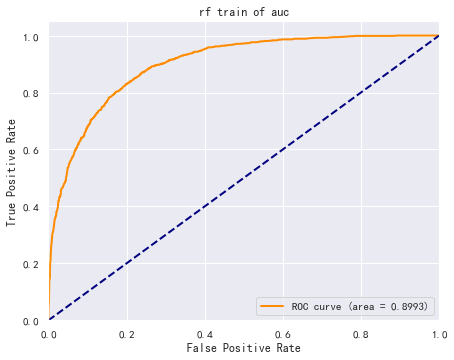

In [ ]:
plot_auc(gs_rf,X_train,y_train,'rf train of auc')

In [ ]:
plot_auc(gs_lr,X_test,y_test,'lr test of auc')

ValueError: multiclass format is not supported

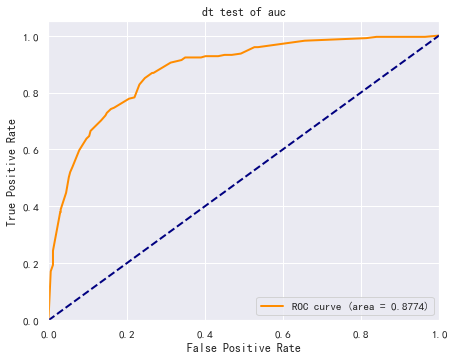

In [ ]:
plot_auc(gs_dt,X_test,y_test,'dt test of auc')

In [ ]:
plot_auc(gs_rf,X_test,y_test,'rf test of auc')

ValueError: multiclass format is not supported